## Uploading the Data

In [ ]:
from google.colab import files

files.upload()

Saving datasets.zip to datasets.zip


## Unzip Dataset

In [ ]:
!unzip datasets.zip

Archive:  datasets.zip
  inflating: class_labels.csv        
  inflating: go_features.csv         
  inflating: gtex_features.csv       
  inflating: kegg_features.csv       
  inflating: mashup_features.csv     
  inflating: pathdipall_features.csv  
  inflating: ppi_features.csv        


In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
os.chdir(r"C:\\Back Ups Gateway\\MS\\University of Strachclyde\\EE997 MSC Project\\Data\\")

In [ ]:
os.getcwd() 

'C:\\Back Ups Gateway\\MS\\University of Strachclyde\\EE997 MSC Project\\Data'

## Reading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import time

start = time.time()
df = pd.read_csv("go_features.csv", encoding= 'unicode_escape')
features = pd.read_csv("class_labels.csv", encoding= 'unicode_escape')
end = time.time()
print(f"Time taken to import datasets: {end - start} seconds")

Time taken to import datasets: 48.06309938430786 seconds


In [ ]:
l_features = list(df. columns)
l_features

['entrezId',
 'GO:2001280',
 'GO:2001270',
 'GO:2001268',
 'GO:2001206',
 'GO:2001187',
 'GO:2001181',
 'GO:2001137',
 'GO:2001027',
 'GO:2001013',
 'GO:2000981',
 'GO:2000977',
 'GO:2000969',
 'GO:2000823',
 'GO:2000821',
 'GO:2000741',
 'GO:2000697',
 'GO:2000686',
 'GO:2000672',
 'GO:2000664',
 'GO:2000653',
 'GO:2000623',
 'GO:2000622',
 'GO:2000589',
 'GO:2000564',
 'GO:2000546',
 'GO:2000491',
 'GO:2000483',
 'GO:2000418',
 'GO:2000389',
 'GO:2000382',
 'GO:2000373',
 'GO:2000371',
 'GO:2000360',
 'GO:2000359',
 'GO:2000354',
 'GO:2000346',
 'GO:2000321',
 'GO:2000320',
 'GO:2000317',
 'GO:2000301',
 'GO:2000232',
 'GO:2000195',
 'GO:2000189',
 'GO:2000172',
 'GO:2000110',
 'GO:2000065',
 'GO:2000048',
 'GO:2000002',
 'GO:1990966',
 'GO:1990834',
 'GO:1990825',
 'GO:1990745',
 'GO:1990726',
 'GO:1990604',
 'GO:1990523',
 'GO:1990454',
 'GO:1990430',
 'GO:1990316',
 'GO:1990182',
 'GO:1990130',
 'GO:1990075',
 'GO:1905903',
 'GO:1905881',
 'GO:1905880',
 'GO:1905771',
 'GO:1905709

## go.obb - Data Description for Gene Ontology Dataset

In [ ]:
!wget http://purl.obolibrary.org/obo/go.obo

--2022-07-24 16:13:00--  http://purl.obolibrary.org/obo/go.obo
Resolving purl.obolibrary.org (purl.obolibrary.org)... 3.223.180.112
Connecting to purl.obolibrary.org (purl.obolibrary.org)|3.223.180.112|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://current.geneontology.org/ontology/go.obo [following]
--2022-07-24 16:13:00--  http://current.geneontology.org/ontology/go.obo
Resolving current.geneontology.org (current.geneontology.org)... 13.32.176.88, 13.32.176.124, 13.32.176.187, ...
Connecting to current.geneontology.org (current.geneontology.org)|13.32.176.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33973666 (32M) [text/obo]
Saving to: ‘go.obo’

go.obo              100%[===================>]  32.40M  51.1MB/s    in 0.6s    

2022-07-24 16:13:01 (51.1 MB/s) - ‘go.obo’ saved [33973666/33973666]



In [ ]:
with open('go.obo') as f:
    lines = f.readlines()

Uid, Name, Namespace, Definition = [], [], [], []
for i,l in enumerate(lines):
  if l[:6] == "id: GO":
    if len(Definition) != len(Uid):
      Definition.append(np.nan)
      Uid.append(l[4:14])
    else:
      Uid.append(l[4:14])
  elif l[:5] == "name:":
    Name.append(l[7:])
  elif l[:10] == "namespace:":
    Namespace.append(l[11:])
  elif l[:4] == "def:":
    Definition.append(l[4:])
  elif l[:9] == "[Typedef]":
    break


      #print(lines[i+1])
#pd.DataFrame({"UniqueID":Uid, "Name":Name, "Namespace":Namespace, "Definition":Definition })      
print(len(Uid),len(Name),len(Namespace),len(Definition))

47331 47331 47331 47331


In [ ]:
GO_df = pd.DataFrame({"UniqueID":Uid, "Name":Name, "Namespace":Namespace, "Definition":Definition })
GO_df

,UniqueID,Name,Namespace,Definition
0,GO:0000001,itochondrion inheritance\n,biological_process\n,"""The distribution of mitochondria, including ..."
1,GO:0000002,itochondrial genome maintenance\n,biological_process\n,"""The maintenance of the structure and integri..."
2,GO:0000003,eproduction\n,biological_process\n,"""The production of new individuals that conta..."
3,GO:0000005,bsolete ribosomal chaperone activity\n,molecular_function\n,"""OBSOLETE. Assists in the correct assembly of..."
4,GO:0000006,igh-affinity zinc transmembrane transporter ac...,molecular_function\n,"""Enables the transfer of zinc ions (Zn2+) fro..."
...,...,...,...,...
47326,GO:2001313,DP-4-deoxy-4-formamido-beta-L-arabinopyranose ...,biological_process\n,"""The chemical reactions and pathways involvin..."
47327,GO:2001314,DP-4-deoxy-4-formamido-beta-L-arabinopyranose ...,biological_process\n,"""The chemical reactions and pathways resultin..."
47328,GO:2001315,DP-4-deoxy-4-formamido-beta-L-arabinopyranose ...,biological_process\n,"""The chemical reactions and pathways resultin..."
47329,GO:2001316,ojic acid metabolic process\n,biological_process\n,"""The chemical reactions and pathways involvin..."


In [ ]:
GO_df = GO_df[GO_df["UniqueID"].isin(l_features) == True]
GO_df

,UniqueID,Name,Namespace,Definition
1,GO:0000002,itochondrial genome maintenance\n,biological_process\n,"""The maintenance of the structure and integri..."
2,GO:0000003,eproduction\n,biological_process\n,"""The production of new individuals that conta..."
10,GO:0000012,ingle strand break repair\n,biological_process\n,"""The repair of single strand breaks in DNA. R..."
11,GO:0000014,ingle-stranded DNA endodeoxyribonuclease activ...,molecular_function\n,"""Catalysis of the hydrolysis of ester linkage..."
12,GO:0000015,hosphopyruvate hydratase complex\n,cellular_component\n,"""A multimeric enzyme complex, usually a dimer..."
...,...,...,...,...
47288,GO:2001275,bsolete positive regulation of glucose import ...,biological_process\n,"""OBSOLETE. Any process that activates or incr..."
47292,GO:2001279,egulation of unsaturated fatty acid biosynthet...,biological_process\n,"""Any process that modulates the frequency, ra..."
47293,GO:2001280,ositive regulation of unsaturated fatty acid b...,biological_process\n,"""Any process that activates or increases the ..."
47299,GO:2001286,egulation of caveolin-mediated endocytosis\n,biological_process\n,"""Any process that modulates the frequency, ra..."


In [ ]:
GO_df["UniqueID"].isin(l_features)

1        True
2        True
10       True
11       True
12       True
         ... 
47288    True
47292    True
47293    True
47299    True
47313    True
Name: UniqueID, Length: 11554, dtype: bool

In [ ]:
GO_df.to_csv("GO Features Data.csv")

In [ ]:
GO_df["Namespace"].value_counts()

biological_process\n    8504
molecular_function\n    1951
cellular_component\n    1099
Name: Namespace, dtype: int64

### Data Analysis

In [ ]:
df

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1622
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1028
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1453
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,544
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,18
18414,729545,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,0,26
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,12


In [ ]:
df.dtypes

entrezId      int64
GO:2001280    int64
GO:2001270    int64
GO:2001268    int64
GO:2001206    int64
              ...  
GO:0044464    int64
GO:0008150    int64
GO:0003674    int64
GO:0005575    int64
go_total      int64
Length: 11953, dtype: object

In [ ]:
for col in list(df.columns):
  print(col ,df[col].value_counts())


Streaming output truncated to the last 5000 lines.
1      117
Name: GO:0045471, dtype: int64
GO:0036459 0    18301
1      117
Name: GO:0036459, dtype: int64
GO:0033135 0    18301
1      117
Name: GO:0033135, dtype: int64
GO:0031047 0    18301
1      117
Name: GO:0031047, dtype: int64
GO:0030176 0    18301
1      117
Name: GO:0030176, dtype: int64
GO:0030135 0    18301
1      117
Name: GO:0030135, dtype: int64
GO:0016616 0    18301
1      117
Name: GO:0016616, dtype: int64
GO:0009116 0    18301
1      117
Name: GO:0009116, dtype: int64
GO:0008277 0    18301
1      117
Name: GO:0008277, dtype: int64
GO:0006164 0    18301
1      117
Name: GO:0006164, dtype: int64
GO:1903169 0    18300
1      118
Name: GO:1903169, dtype: int64
GO:0071219 0    18300
1      118
Name: GO:0071219, dtype: int64
GO:0043279 0    18300
1      118
Name: GO:0043279, dtype: int64
GO:0043271 0    18300
1      118
Name: GO:0043271, dtype: int64
GO:0034250 0    18300
1      118
Name: GO:0034250, dtype: int64
GO:0030817 

In [ ]:
df.select_dtypes("object")

""
0
1
2
3
4
...
18413
18414
18415
18416


In [ ]:
df["go_total"].value_counts()

4       362
3       234
70      233
67      223
45      177
       ... 
623       1
2273      1
1026      1
802       1
605       1
Name: go_total, Length: 955, dtype: int64

In [ ]:
features.isnull().sum()

entrezId                             0
class_Brain.Alzheimer                0
class_Brain.Multiple.Sclerosis       0
class_Brain.Parkinson                0
class_Disease.Brain                  0
class_Disease.Heart                  0
class_Disease.Immune                 0
class_Disease.Muscle                 0
class_Disease.Neoplasm               0
class_Disease.Nutrition              0
class_Heart.Arteriosclerosis         0
class_Heart.Coronary.Disease         0
class_Heart.Hypertension             0
class_Heart.Myocardial.Infarction    0
class_Immune.Hypersensitivity        0
class_Muscle.Arthritis               0
class_Muscle.Osteoporosis            0
class_Neoplasm.Adenocarcinoma        0
class_Neoplasm.Breast                0
class_Neoplasm.Colorectal            0
class_Neoplasm.Lung                  0
class_Neoplasm.Prostatic             0
class_Neoplasm.Stomach               0
class_Nutritional.Diabetes.Type1     0
class_Nutritional.Diabetes.Type2     0
class_Nutritional.Obesity

In [ ]:
features.dtypes

entrezId                              int64
class_Brain.Alzheimer                object
class_Brain.Multiple.Sclerosis       object
class_Brain.Parkinson                object
class_Disease.Brain                  object
class_Disease.Heart                  object
class_Disease.Immune                 object
class_Disease.Muscle                 object
class_Disease.Neoplasm               object
class_Disease.Nutrition              object
class_Heart.Arteriosclerosis         object
class_Heart.Coronary.Disease         object
class_Heart.Hypertension             object
class_Heart.Myocardial.Infarction    object
class_Immune.Hypersensitivity        object
class_Muscle.Arthritis               object
class_Muscle.Osteoporosis            object
class_Neoplasm.Adenocarcinoma        object
class_Neoplasm.Breast                object
class_Neoplasm.Colorectal            object
class_Neoplasm.Lung                  object
class_Neoplasm.Prostatic             object
class_Neoplasm.Stomach          

In [ ]:
for col in features.columns:
  print(f"Feature: {col}")
  print(features[col].value_counts())

Feature: entrezId
348          1
100101267    1
170392       1
160418       1
150468       1
            ..
10598        1
9371         1
5540         1
4245         1
340335       1
Name: entrezId, Length: 20659, dtype: int64
Feature: class_Brain.Alzheimer
0    19071
?     1473
1      115
Name: class_Brain.Alzheimer, dtype: int64
Feature: class_Brain.Multiple.Sclerosis
0    19137
?     1473
1       49
Name: class_Brain.Multiple.Sclerosis, dtype: int64
Feature: class_Brain.Parkinson
0    19138
?     1473
1       48
Name: class_Brain.Parkinson, dtype: int64
Feature: class_Disease.Brain
0     19008
?      1472
1       178
£¿        1
Name: class_Disease.Brain, dtype: int64
Feature: class_Disease.Heart
0    18903
?     1473
1      283
Name: class_Disease.Heart, dtype: int64
Feature: class_Disease.Immune
0    19135
?     1473
1       51
Name: class_Disease.Immune, dtype: int64
Feature: class_Disease.Muscle
0    19081
?     1473
1      105
Name: class_Disease.Muscle, dtype: int64
Feature: c

In [ ]:
features.columns

Index(['entrezId', 'class_Brain.Alzheimer', 'class_Brain.Multiple.Sclerosis',
       'class_Brain.Parkinson', 'class_Disease.Brain', 'class_Disease.Heart',
       'class_Disease.Immune', 'class_Disease.Muscle',
       'class_Disease.Neoplasm', 'class_Disease.Nutrition',
       'class_Heart.Arteriosclerosis', 'class_Heart.Coronary.Disease',
       'class_Heart.Hypertension', 'class_Heart.Myocardial.Infarction',
       'class_Immune.Hypersensitivity', 'class_Muscle.Arthritis',
       'class_Muscle.Osteoporosis', 'class_Neoplasm.Adenocarcinoma',
       'class_Neoplasm.Breast', 'class_Neoplasm.Colorectal',
       'class_Neoplasm.Lung', 'class_Neoplasm.Prostatic',
       'class_Neoplasm.Stomach', 'class_Nutritional.Diabetes.Type1',
       'class_Nutritional.Diabetes.Type2', 'class_Nutritional.Obesity',
       'class_Respiratory.Asthma', 'class_Disease'],
      dtype='object')

## Heart Disease Dataset

In [ ]:
heart = pd.merge(df,features[["entrezId","class_Disease.Heart"]], on = ["entrezId"])

In [ ]:
heart

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Disease.Heart
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,18,?
18414,729545,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,26,?
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,?
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,?


11953 column in go dataset

In [ ]:
heart.isnull().sum()

entrezId               0
GO:2001280             0
GO:2001270             0
GO:2001268             0
GO:2001206             0
                      ..
GO:0008150             0
GO:0003674             0
GO:0005575             0
go_total               0
class_Disease.Heart    0
Length: 11954, dtype: int64

In [ ]:
heart["class_Disease.Heart"].value_counts()

0    17983
1      283
?      152
Name: class_Disease.Heart, dtype: int64

Let's remove features having question mark

In [ ]:
heart = heart[heart["class_Disease.Heart"] != "?"]
heart

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Disease.Heart
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,399949,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,14,0
18406,100288287,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,11,0
18407,728588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0
18409,401667,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,48,0


Let's drop the entrezId since it is a unique value. We'll also drop go_total.

In [ ]:
heart.drop(["entrezId","go_total"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
heart

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Disease.Heart
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [ ]:
heart.select_dtypes("object")

,class_Disease.Heart
0,1
1,0
2,0
3,1
4,0
...,...
18404,0
18406,0
18407,0
18409,0


In [ ]:
heart["class_Disease.Heart"] = pd.to_numeric(heart["class_Disease.Heart"])
heart.select_dtypes("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


""
0
1
2
3
4
...
18404
18406
18407
18409


### Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [ ]:
heart

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Disease.Heart
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


### Upsampling using minority target class using resample

In [ ]:
heart_0 = heart[heart["class_Disease.Heart"] == 0]
heart_1 = heart[heart["class_Disease.Heart"] == 1]

In [ ]:
print(heart_0.shape,heart_1.shape)

(17983, 11953) (283, 11953)


In [ ]:
from sklearn.utils import resample

In [ ]:
df_1_upsampled = resample(heart_1, 
                                 replace=True,   
                                 n_samples=17983)

In [ ]:
print(heart_0.shape,df_1_upsampled.shape)

(17983, 11953) (17983, 11953)


In [ ]:
heart = pd.concat([heart_0,df_1_upsampled])

In [ ]:
heart

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Disease.Heart
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,874,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,959,1
127,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1655,1
142,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,653,1
1144,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,854,1


In [ ]:
heart['class_Disease.Heart'].value_counts()

0    17983
1      283
Name: class_Disease.Heart, dtype: int64

In [ ]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Train-Test Split

In [ ]:
X_heart = heart.drop(["class_Disease.Heart"],axis = 1)
Y_heart = heart["class_Disease.Heart"]

X_train, X_test, y_train, y_test = train_test_split(X_heart, Y_heart, test_size=0.30, random_state=42)


In [ ]:
X_train

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0050789,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575
18257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
16843,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
7590,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,1
8121,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2211,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,1
11979,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5394,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
861,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_train.value_counts()

0    12585
1      201
Name: class_Disease.Heart, dtype: int64

In [ ]:
heart_train = pd.concat([X_train,y_train],axis = 1)
heart_train

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Disease.Heart
18257,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,7,0
16843,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,70,0
7590,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,202,0
8121,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,229,0
2211,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,168,0
11979,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,124,0
5394,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,307,0
861,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,397,0


In [ ]:
y_train.value_counts()

0    12585
1      201
Name: class_Disease.Heart, dtype: int64

Resampling Data

In [ ]:
heart_0 = heart_train[heart_train["class_Disease.Heart"] == 0]
heart_1 = heart_train[heart_train["class_Disease.Heart"] == 1]

In [ ]:
from sklearn.utils import resample

heart_1_upsampled = resample(heart_1, 
                                 replace=True,   
                                 n_samples=12585)

In [ ]:
X_train = pd.concat([heart_0,heart_1_upsampled])
y_train = X_train["class_Disease.Heart"]
X_train = X_train.drop("class_Disease.Heart", axis = 1)

In [ ]:
X_train

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total
18257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,7
16843,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,70
7590,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,1,1,202
8121,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,229
2211,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,212
613,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,713
809,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,193
603,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,542


In [ ]:
y_train.value_counts()

0    12585
1    12585
Name: class_Disease.Heart, dtype: int64

ADASYN DATASET

### Upsampling using ADASYN(Adaptive Synthetic):
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

<b>ADASYN Algorithm-</b>

Step 1:Calculate the ratio of minority to majority examples.

Step 2: Calculate the total number of synthetic minority data to generate.

Step 3: Find the k-Nearest Neighbours of each minority example and calculate the rᵢ value. After this step, each minority example should be associated with a different neighbourhood.The rᵢ value indicates the dominance of the majority class in each specific neighbourhood. Higher rᵢ neighbourhoods contain more majority class examples and are more difficult to learn. 

Step 4: Normalize the rᵢ values so that the sum of all rᵢ values equals to 1.

Step 5: Calculate the amount of synthetic examples to generate per neighbourhood.

Step 6: Generate Gᵢ data for each neighbourhood. First, take the minority example for the neighbourhood, xᵢ. Then, randomly select another minority example within that neighbourhood, xzᵢ.

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 1)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
print("Upsampling using ADASYN Complete!")

Upsampling using ADASYN Complete!


In [ ]:
y_train_ada.value_counts()

1    12619
0    12585
Name: class_Disease.Heart, dtype: int64

### Upsampling using SMOTE(Synthetic Minority Over-sampling Technique)

SMOTE is performing the same basic task as basic resampling (creating new data points for the minority class) but instead of simply duplicating observations, it creates new observations along the lines of a randomly chosen point and its nearest neighbors.

The SMOTE algorithm works as follows:

* You draw a random sample from the minority class.
* For the observations in this sample, you will identify the k nearest neighbors.
* You will then take one of those neighbors and identify the vector between the current data point and the selected neighbor.
* You multiply the vector by a random number between 0 and 1.
* To obtain the synthetic data point, you add this to the current data point.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print("Upsampling using SMOTE Complete!")

Upsampling using SMOTE Complete!


In [ ]:
y_train_smote.value_counts()

0    12585
1    12585
Name: class_Disease.Heart, dtype: int64

### Logistic regression Model for predicting Heart Disease

In [ ]:
start = time.time()
clf_heart = LogisticRegression(max_iter = 30000).fit(X_train_smote,y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 30.186879634857178 seconds


In [ ]:
y_pred = clf_heart.predict_proba(X_test)
y_pred

array([[1.00000000e+00, 4.84256835e-10],
       [9.97249078e-01, 2.75092231e-03],
       [9.99772573e-01, 2.27427019e-04],
       ...,
       [1.32141676e-01, 8.67858324e-01],
       [9.99541731e-01, 4.58269140e-04],
       [9.99999426e-01, 5.73534060e-07]])

In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
sum(y_pred)

316

In [ ]:
TP, TN, FN, FP = 0, 0, 0, 0
for real,pred in zip(y_test,y_pred):
    if (real == 1 and pred == 1):
      TP += 1
    elif (real == 0 and pred == 1):
      FP += 1
    elif (real == 1 and pred == 0):
      FN += 1
    else:
      TN += 1
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2*Precision*Recall)/(Precision + Recall)

print(f"Accuracy:    {Accuracy} \nPrecision:    {Precision}  \nRecall:    {Recall}  \nF1 Score:    {F1_Score}")

Accuracy:    0.9343065693430657 
Precision:    0.060126582278481014  
Recall:    0.23170731707317074  
F1 Score:    0.09547738693467336


In [ ]:
print(f"TP: {TP} \tTN: {TN} \tFN: {FN} \tFP: {FP}")

TP: 19 	TN: 5101 	FN: 63 	FP: 297


In [ ]:
roc_auc_score(y_test,y_pred)

0.6263814963084792

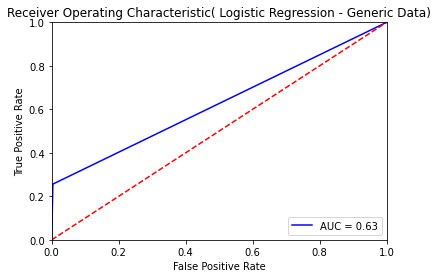

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - Generic Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

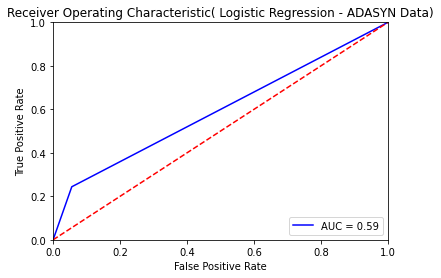

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - ADASYN Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_train.value_counts()

0    12585
1      201
Name: class_Disease.Heart, dtype: int64

In [ ]:
roc_auc

0.5940705229579157

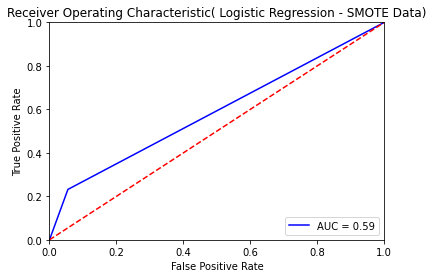

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - SMOTE Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5883434695777118

In [ ]:
import pickle

pickle.dump(clf_heart,open("Heart_Logistic_Regresion", 'wb'))

### Random Forest Model for predicting Heart Disease

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_heart_rf = RandomForestClassifier()
start = time.time()
clf_heart_rf.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 52.66951274871826 seconds


In [ ]:
y_pred = clf_heart_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
def eval(y_test,y_pred):
  TP, TN, FN, FP = 0, 0, 0, 0
  for real,pred in zip(y_test,y_pred):
    if (real == 1 and pred == 1):
      TP += 1
    elif (real == 0 and pred == 1):
      FP += 1
    elif (real == 1 and pred == 0):
      FN += 1
    else:
      TN += 1
  Accuracy = (TP + TN)/(TP+TN+FP+FN)
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  F1_Score = (2*Precision*Recall)/(Precision + Recall)
  print(f"TP: {TP} \tTN: {TN} \tFN: {FN} \tFP: {FP}")
  return (f"Accuracy:{Accuracy}    Precision:{Precision}    Recall:{Recall}    F1 Score:{F1_Score}")

#rint(f"Accuracy:    {Accuracy} \nPrecision:    {Precision}  \nRecall:    {Recall}")

In [ ]:
eval(y_test,y_pred)

TP: 5 	TN: 5310 	FN: 77 	FP: 88


'Accuracy:0.9698905109489051    Precision:0.053763440860215055    Recall:0.06097560975609756    F1 Score:0.05714285714285714'

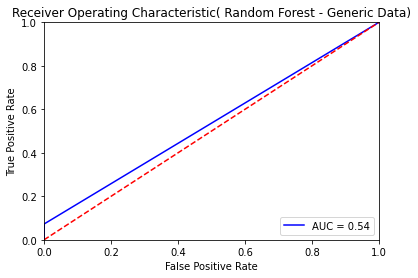

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - Generic Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.5363074851571044

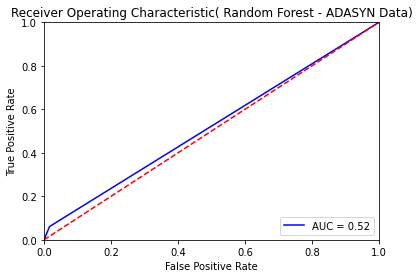

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - ADASYN Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5223366377791232

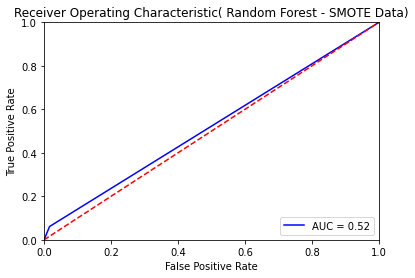

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - SMOTE Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5223366377791232

In [ ]:
pickle.dump(clf_heart,open("Heart_Random_Forest", 'wb'))

In [ ]:
features.columns

Index(['entrezId', 'class_Brain.Alzheimer', 'class_Brain.Multiple.Sclerosis',
       'class_Brain.Parkinson', 'class_Disease.Brain', 'class_Disease.Heart',
       'class_Disease.Immune', 'class_Disease.Muscle',
       'class_Disease.Neoplasm', 'class_Disease.Nutrition',
       'class_Heart.Arteriosclerosis', 'class_Heart.Coronary.Disease',
       'class_Heart.Hypertension', 'class_Heart.Myocardial.Infarction',
       'class_Immune.Hypersensitivity', 'class_Muscle.Arthritis',
       'class_Muscle.Osteoporosis', 'class_Neoplasm.Adenocarcinoma',
       'class_Neoplasm.Breast', 'class_Neoplasm.Colorectal',
       'class_Neoplasm.Lung', 'class_Neoplasm.Prostatic',
       'class_Neoplasm.Stomach', 'class_Nutritional.Diabetes.Type1',
       'class_Nutritional.Diabetes.Type2', 'class_Nutritional.Obesity',
       'class_Respiratory.Asthma', 'class_Disease'],
      dtype='object')

### Neural Network using PyTorch to predict Heart Disease

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
torch.__version__

'1.12.0+cu113'

In [ ]:
featuresTrain = torch.from_numpy(X_train_smote.to_numpy()).type(torch.FloatTensor)#.to(device)
targetsTrain = torch.from_numpy(y_train_smote.to_numpy()).type(torch.FloatTensor)

featuresTest = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)#.to(device)
targetsTest = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

In [ ]:
featuresTrain

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

In [ ]:
targetsTrain

tensor([0., 0., 0.,  ..., 1., 1., 1.])

In [ ]:
num_epochs = 10

#train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
#test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

#train_loader = torch.utils.data.DataLoader(train, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test, shuffle=True)

In [ ]:
train_loader

In [ ]:
targetsTrain = targetsTrain.to(torch.float32)
targetsTest = targetsTest.to(torch.float32)

In [ ]:
targetsTrain.dtype

torch.float32

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11951, 10500),
            nn.Tanh(),
            nn.Linear(10500, 8000),
            nn.Tanh(),
            nn.Linear(8000, 5000),
            nn.Sigmoid(),
            nn.Linear(5000,3000),
            nn.Tanh(),
            nn.Linear(3000,1000),
            nn.Sigmoid(),
            nn.Linear(1000, 1),
            nn.Sigmoid()

        )
        
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


net = Net()#.to(device)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
X_train.shape[1]

11951

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum = 0.5)
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
targetsTest

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
batch = next(iter(train_loader))
yhat = net(batch.text)

from torchviz import make_dot

make_dot(yhat, params=dict(list(net.named_parameters()))).render("nn_torchviz", format="png")

AttributeError: ignored

In [ ]:
print(data[0].shape,data[1].shape)

torch.Size([100, 11952]) torch.Size([100])


In [ ]:
print(X_train.shape,y_train.shape)

(12786, 11952) (12786,)


In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(30):
  print(f'Epoch: {epoch}')
  #optimizer.zero_grad()
  y_train_pred = net(featuresTrain)
  y_train_pred = torch.squeeze(y_train_pred)
  train_loss = criterion(y_train_pred, targetsTrain)
  train_loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    train_acc = calculate_accuracy(targetsTrain, y_train_pred)
    y_test_pred = net(featuresTest)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, targetsTest)
    test_acc = calculate_accuracy(targetsTest, y_test_pred)
    print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

Epoch: 0
epoch 0
Train set - loss: 0.696, accuracy: 0.5
Test  set - loss: 0.72, accuracy: 0.015

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
epoch 10
Train set - loss: 0.863, accuracy: 0.5
Test  set - loss: 0.339, accuracy: 0.985

Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
epoch 20
Train set - loss: 1.783, accuracy: 0.5
Test  set - loss: 0.834, accuracy: 0.015

Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29


In [ ]:
y_test.value_counts()

0    5398
1      82
Name: class_Disease.Heart, dtype: int64

In [ ]:
print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 29
Train set - loss: 0.693, accuracy: 0.5
Test  set - loss: 0.834, accuracy: 0.015



In [ ]:
y_test_pred

tensor([0.5673, 0.5674, 0.5674,  ..., 0.5674, 0.5674, 0.5674],
       grad_fn=<SqueezeBackward0>)

ValueError: ignored

In [ ]:
print(f'Max Pred: {max(y_test_pred)} \tMin Pred: {min(y_test_pred)}')

Max Pred: 0.5675353407859802 	Min Pred: 0.5671187043190002


In [ ]:
roc_auc

0.4801631588935378

In [ ]:
max(y_test_pred) == min(y_test_pred)

tensor(False)

In [ ]:
# Generic Data = 9.099e-23
# ADASYN = 0.1790985
# SMOTE = 0.567445

In [ ]:
tres = 0.567445
print(sum(y_test_pred > tres))
print(y_test_pred[y_test_pred > tres])

tensor(168)
tensor([0.5674, 0.5674, 0.5674, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675,
        0.5674, 0.5674, 0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5675,
        0.5674, 0.5674, 0.5674, 0.5675, 0.5674, 0.5674, 0.5674, 0.5674, 0.5675,
        0.5675, 0.5674, 0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5674,
        0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675,
        0.5675, 0.5674, 0.5675, 0.5675, 0.5674, 0.5675, 0.5674, 0.5675, 0.5675,
        0.5674, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675,
        0.5674, 0.5675, 0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5674,
        0.5675, 0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5675, 0.5675, 0.5674,
        0.5675, 0.5675, 0.5674, 0.5674, 0.5675, 0.5674, 0.5674, 0.5675, 0.5675,
        0.5674, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5674,
        0.5675, 0.5675, 0.5675, 0.5674, 0.5675, 0.5674, 0.5675, 0.5674, 0.5675,
        0.5675, 0.5675, 0.56

In [ ]:
min(y_test_pred)

tensor(0.5671, grad_fn=<UnbindBackward0>)

In [ ]:
y_pred_np = np.array([1 if (x > tres) else 0 for x in y_test_pred])

In [ ]:
y_test_np = np.array(targetsTest)

In [ ]:
y_pred_np

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
eval(targetsTest,y_pred_np)

TP: 5 	TN: 5235 	FN: 77 	FP: 163


'Accuracy:0.9562043795620438    Precision:0.02976190476190476    Recall:0.06097560975609756    F1 Score:0.039999999999999994'

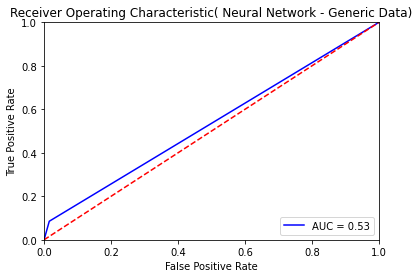

In [ ]:
# Incorrect
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(targetsTest, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - Generic Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5462637471873052

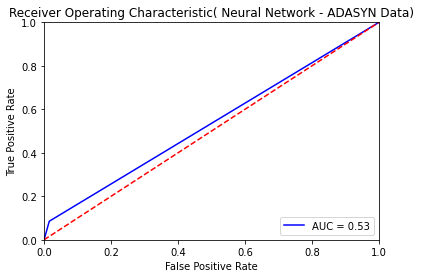

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(targetsTest, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - ADASYN Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5349022673257485

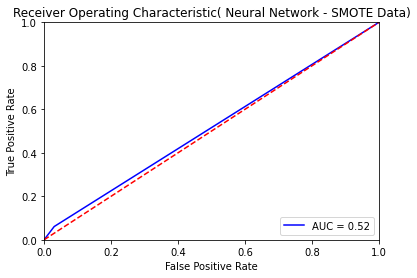

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(targetsTest, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - SMOTE Data)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5153896203652663

11m 2s time to train Neural Network Model

In [ ]:
torch.save(net.state_dict(), "Heart_Neural_Network")

In [ ]:
import os
os.getcwd()

'/content'

## Type 2 Diabetes Dataset

In [ ]:
diabetes = pd.merge(df,features[["entrezId","class_Nutritional.Diabetes.Type2"]], on = ["entrezId"])
diabetes

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Nutritional.Diabetes.Type2
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,18,?
18414,729545,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,26,?
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,?
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,?


In [ ]:
diabetes.isnull().sum()

entrezId                            0
GO:2001280                          0
GO:2001270                          0
GO:2001268                          0
GO:2001206                          0
                                   ..
GO:0008150                          0
GO:0003674                          0
GO:0005575                          0
go_total                            0
class_Nutritional.Diabetes.Type2    0
Length: 11954, dtype: int64

In [ ]:
diabetes.dtypes

entrezId                             int64
GO:2001280                           int64
GO:2001270                           int64
GO:2001268                           int64
GO:2001206                           int64
                                     ...  
GO:0008150                           int64
GO:0003674                           int64
GO:0005575                           int64
go_total                             int64
class_Nutritional.Diabetes.Type2    object
Length: 11954, dtype: object

In [ ]:
diabetes.select_dtypes("object")

,class_Nutritional.Diabetes.Type2
0,1
1,0
2,0
3,1
4,0
...,...
18413,?
18414,?
18415,?
18416,?


In [ ]:
diabetes["class_Nutritional.Diabetes.Type2"].value_counts()

0    18052
1      214
?      152
Name: class_Nutritional.Diabetes.Type2, dtype: int64

In [ ]:
diabetes = diabetes[diabetes["class_Nutritional.Diabetes.Type2"] != "?"]
diabetes

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Nutritional.Diabetes.Type2
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,399949,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,14,0
18406,100288287,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,11,0
18407,728588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0
18409,401667,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,48,0


In [ ]:
diabetes.drop(["entrezId","go_total"], axis = 1, inplace = True)
diabetes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Nutritional.Diabetes.Type2
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [ ]:
diabetes["class_Nutritional.Diabetes.Type2"] = pd.to_numeric(diabetes["class_Nutritional.Diabetes.Type2"])
diabetes.select_dtypes("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


""
0
1
2
3
4
...
18404
18406
18407
18409


### Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Train-Test Split

In [ ]:
X_diabetes = diabetes.drop(["class_Nutritional.Diabetes.Type2"],axis = 1)
Y_diabetes = diabetes["class_Nutritional.Diabetes.Type2"]

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.30, random_state=42)


In [ ]:
y_train.value_counts()

0    12634
1      152
Name: class_Nutritional.Diabetes.Type2, dtype: int64

### Upsampling using ADASYN(Adaptive Synthetic):

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 1)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
print("Upsampling using ADASYN Complete!")

Upsampling using ADASYN Complete!


In [ ]:
y_train_ada.value_counts()

1    12683
0    12634
Name: class_Nutritional.Diabetes.Type2, dtype: int64

### Upsampling using SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print("Upsampling using SMOTE Complete!")

Upsampling using SMOTE Complete!


In [ ]:
y_train_smote.value_counts()

0    12634
1    12634
Name: class_Nutritional.Diabetes.Type2, dtype: int64

### Logistic Regression Model for predicting Type II diabetes

In [ ]:
start = time.time()
clf_dia2 = LogisticRegression(max_iter = 30000).fit(X_train_smote,y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 32.92323875427246 seconds


In [ ]:
y_pred = clf_dia2.predict_proba(X_test)
y_pred

array([[1.00000000e+00, 1.35385041e-10],
       [9.93868492e-01, 6.13150811e-03],
       [9.64742441e-01, 3.52575590e-02],
       ...,
       [2.05350259e-01, 7.94649741e-01],
       [9.99861598e-01, 1.38401718e-04],
       [9.99899160e-01, 1.00840280e-04]])

In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
eval(y_test,y_pred)

TP: 9 	TN: 5126 	FN: 53 	FP: 292


'Accuracy:0.9370437956204379    Precision:0.029900332225913623    Recall:0.14516129032258066    F1 Score:0.049586776859504134'

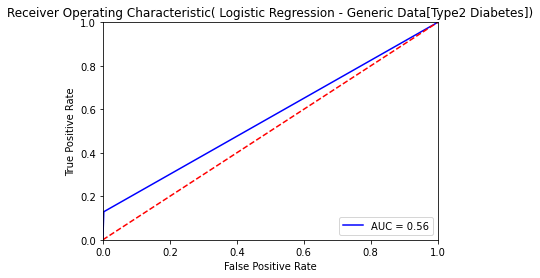

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - Generic Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5631318543921694

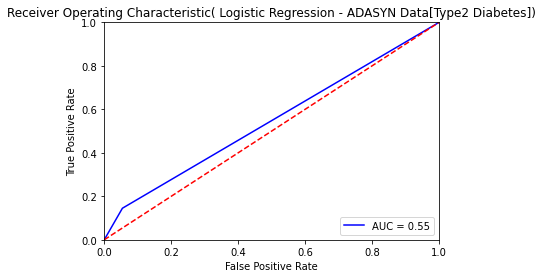

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - ADASYN Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.545448862215554

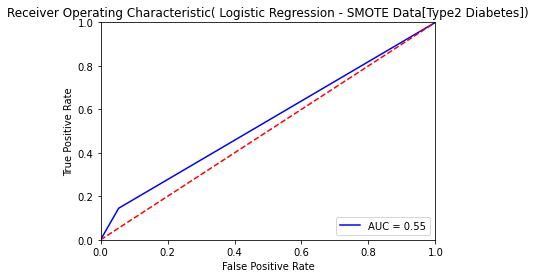

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - SMOTE Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5456334321675658

In [ ]:
pickle.dump(clf_dia2,open("DiabetesII_Logistic_Regresion", 'wb'))

### Random Forest Model for predicting Type II diabetes

In [ ]:
clf_dia2_rf = RandomForestClassifier()
start = time.time()
clf_dia2_rf.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"Time taken to train Random Forest Model: {end - start} seconds")

Time taken to train Random Forest Model: 57.82959508895874 seconds


In [ ]:
y_pred = clf_dia2_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
eval(y_test,y_pred)

TP: 2 	TN: 5341 	FN: 60 	FP: 77


'Accuracy:0.975    Precision:0.02531645569620253    Recall:0.03225806451612903    F1 Score:0.028368794326241134'

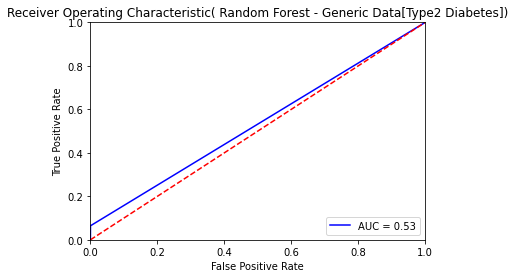

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - Generic Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5321657795401231

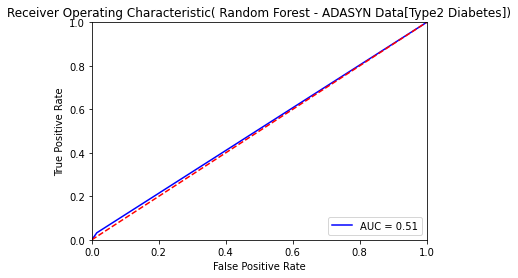

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - ADASYN Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5086539492015861

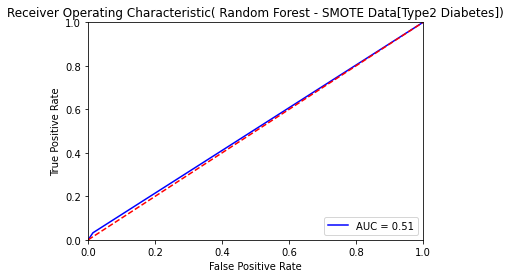

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - SMOTE Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5090230891056097

In [ ]:
pickle.dump(clf_dia2_rf,open("DiabetesII_Random_Forest", 'wb'))

### Neural Network using Pytorch to predict Type II diabetes

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
featuresTrain = torch.from_numpy(X_train_smote.to_numpy()).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(y_train_smote.to_numpy()).type(torch.FloatTensor)

featuresTest = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
targetsTest = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

#batch_size = 100
#n_iters = 10000
num_epochs = 30

#train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
#test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

#train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
#test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

#train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
#test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

#targetsTrain = targetsTrain.to(torch.float32)
#targetsTest = targetsTest.to(torch.float32)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11951, 10500),
            nn.Tanh(),
            nn.Linear(10500, 8000),
            nn.Tanh(),
            nn.Linear(8000, 5000),
            nn.Sigmoid(),
            nn.Linear(5000,3000),
            nn.Tanh(),
            nn.Linear(3000,1000),
            nn.Sigmoid(),
            nn.Linear(1000, 1),
            nn.Sigmoid()

        )
        
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


net = Net()#.to(device)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001,momentum = 0.7)
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(30):
  print(f'Epoch: {epoch}')
  #optimizer.zero_grad()
  y_train_pred = net(featuresTrain)
  y_train_pred = torch.squeeze(y_train_pred)
  train_loss = criterion(y_train_pred, targetsTrain)
  train_loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    train_acc = calculate_accuracy(targetsTrain, y_train_pred)
    y_test_pred = net(featuresTest)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, targetsTest)
    test_acc = calculate_accuracy(targetsTest, y_test_pred)
    print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

Epoch: 0
epoch 0
Train set - loss: 0.7, accuracy: 0.5
Test  set - loss: 0.805, accuracy: 0.011

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
epoch 10
Train set - loss: 0.717, accuracy: 0.5
Test  set - loss: 0.543, accuracy: 0.989

Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
epoch 20
Train set - loss: 0.755, accuracy: 0.5
Test  set - loss: 0.847, accuracy: 0.011

Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29


In [ ]:
print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 29
Train set - loss: 1.135, accuracy: 0.5
Test  set - loss: 0.847, accuracy: 0.011



In [ ]:
y_test_pred

tensor([0.5726, 0.5727, 0.5727,  ..., 0.5727, 0.5727, 0.5727],
       grad_fn=<SqueezeBackward0>)

In [ ]:
print(f'Max Pred: {max(y_test_pred)} \tMin Pred: {min(y_test_pred)}')

Max Pred: 0.572849690914154 	Min Pred: 0.5724327564239502


In [ ]:
max(y_test_pred) == min(y_test_pred)

tensor(False)

In [ ]:
# Generic Threshold : 3.3671e-13 
# ADASYN Threshold: 0.53091
# SMOTE: 0.57277

In [ ]:
y_test.value_counts()

0    5418
1      62
Name: class_Nutritional.Diabetes.Type2, dtype: int64

In [ ]:
tres =  0.57277
print(sum(y_test_pred > tres))
print(y_test_pred[y_test_pred > tres])


tensor(100)
tensor([0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728, 0.5728,
        0.5728], grad_fn=<IndexBackward0>)


In [ ]:
y_pred_np = np.array([1 if (x > tres) else 0 for x in y_test_pred])
y_test_np = np.array(targetsTest)
y_pred_np

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
eval(targetsTest,y_pred_np)

TP: 6 	TN: 5324 	FN: 56 	FP: 94


'Accuracy:0.9726277372262774    Precision:0.06    Recall:0.0967741935483871    F1 Score:0.07407407407407407'

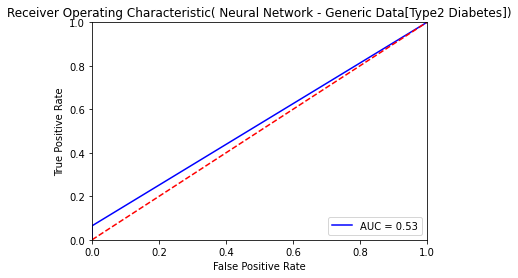

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - Generic Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5321657795401231

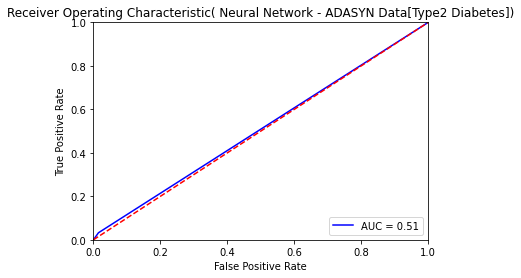

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - ADASYN Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5086539492015861

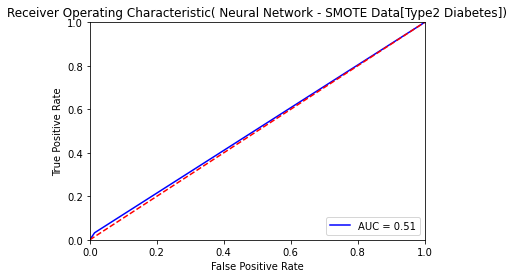

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - SMOTE Data[Type2 Diabetes])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5090230891056097

In [ ]:
torch.save(net.state_dict(), "DiabetesII_Neural_Network")

# Brain - Alzheimer Dataset

In [ ]:
alz = pd.merge(df,features[["entrezId","class_Brain.Alzheimer"]], on = ["entrezId"])
alz

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Brain.Alzheimer
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,1
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,18,?
18414,729545,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,26,?
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,?
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,?


In [ ]:
alz.isnull().sum()

entrezId                 0
GO:2001280               0
GO:2001270               0
GO:2001268               0
GO:2001206               0
                        ..
GO:0008150               0
GO:0003674               0
GO:0005575               0
go_total                 0
class_Brain.Alzheimer    0
Length: 11954, dtype: int64

In [ ]:
alz.dtypes

entrezId                  int64
GO:2001280                int64
GO:2001270                int64
GO:2001268                int64
GO:2001206                int64
                          ...  
GO:0008150                int64
GO:0003674                int64
GO:0005575                int64
go_total                  int64
class_Brain.Alzheimer    object
Length: 11954, dtype: object

In [ ]:
alz.select_dtypes("object")

,class_Brain.Alzheimer
0,1
1,1
2,0
3,1
4,0
...,...
18413,?
18414,?
18415,?
18416,?


In [ ]:
alz["class_Brain.Alzheimer"].value_counts()

0    18151
?      152
1      115
Name: class_Brain.Alzheimer, dtype: int64

In [ ]:
alz = alz[alz["class_Brain.Alzheimer"] != "?"]
alz.drop(["entrezId","go_total"], axis = 1, inplace = True)
alz["class_Brain.Alzheimer"] = pd.to_numeric(alz["class_Brain.Alzheimer"])
alz.select_dtypes("object")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


""
0
1
2
3
4
...
18404
18406
18407
18409


In [ ]:
alz

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Brain.Alzheimer
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [ ]:
alz

,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Brain.Alzheimer
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Train-Test Split

In [ ]:
X_alz = alz.drop(["class_Brain.Alzheimer"],axis = 1)
Y_alz = alz["class_Brain.Alzheimer"]
X_train, X_test, y_train, y_test = train_test_split(X_alz, Y_alz, test_size=0.30, random_state=42)

y_train.value_counts()


0    12717
1       69
Name: class_Brain.Alzheimer, dtype: int64

## Upsampling using ADASYN(Adaptive Synthetic)

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 1)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
print("Upsampling using ADASYN Complete!")

Upsampling using ADASYN Complete!


In [ ]:
y_train_ada.value_counts()

1    12723
0    12717
Name: class_Brain.Alzheimer, dtype: int64

## Upsampling using SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print("Upsampling using SMOTE Complete!")

Upsampling using SMOTE Complete!


In [ ]:
y_train_smote.value_counts()

0    12717
1    12717
Name: class_Brain.Alzheimer, dtype: int64

## Logistic Regression Model for predicting Alzheimer

In [ ]:
import time

start = time.time()
clf_alz = LogisticRegression(max_iter = 30000).fit(X_train_smote,y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 36.31141519546509 seconds


In [ ]:
def eval(y_test,y_pred):
  TP, TN, FN, FP = 0, 0, 0, 0
  for real,pred in zip(y_test,y_pred):
    if (real == 1 and pred == 1):
      TP += 1
    elif (real == 0 and pred == 1):
      FP += 1
    elif (real == 1 and pred == 0):
      FN += 1
    else:
      TN += 1
  try:
    Accuracy = (TP + TN)/(TP+TN+FP+FN)
  except:
    Accuracy = "Couldn't calculate Accuracy"
  try:
    Precision = TP/(TP+FP)
  except:
    Precision = "Couldn't calculate Precision"
  try:
    Recall = TP/(TP+FN)
  except:
    Recall = "Couldn't calculate Recall"
  try:
    F1_Score = (2*Precision*Recall)/(Precision + Recall)
  except:
    F1_Score = "Couldn't calculate F1 Score"
    
  print(f"TP: {TP} \tTN: {TN} \tFN: {FN} \tFP: {FP}")
  return (f"Accuracy:{Accuracy}    Precision:{Precision}    Recall:{Recall}    F1 Score:{F1_Score}")

In [ ]:
y_pred = clf_alz.predict_proba(X_test)
y_pred

array([[9.99999997e-01, 2.90196618e-09],
       [9.98579335e-01, 1.42066486e-03],
       [9.90194723e-01, 9.80527670e-03],
       ...,
       [9.91469041e-01, 8.53095922e-03],
       [9.99748789e-01, 2.51211370e-04],
       [9.99816247e-01, 1.83752572e-04]])

In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
eval(y_test,y_pred)

TP: 3 	TN: 5271 	FN: 43 	FP: 163


'Accuracy:0.9624087591240876    Precision:0.018072289156626505    Recall:0.06521739130434782    F1 Score:0.028301886792452827'

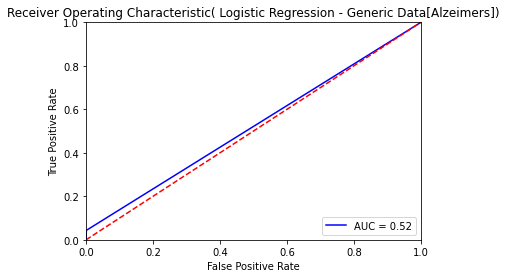

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - Generic Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5212790641852427

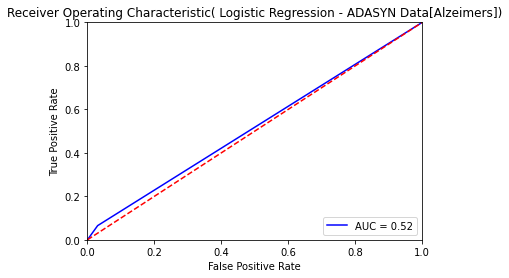

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - ADASYN Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5173344961674482

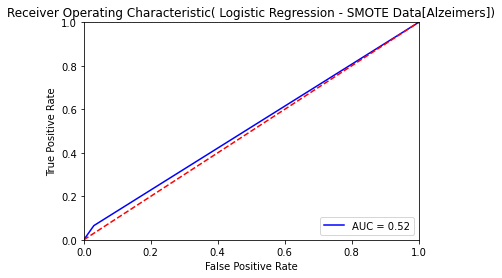

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - SMOTE Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5176105359171721

In [ ]:
import pickle

pickle.dump(clf_alz,open("Alz_Logistic_Regresion", 'wb'))

## Random Forest Model for predicting Alzheimer

In [ ]:
clf_alz_rf = RandomForestClassifier()
start = time.time()
clf_alz_rf.fit(X_train_ada, y_train_ada)
end = time.time()
print(f"Time taken to train Random Forest Model: {end - start} seconds")

Time taken to train Random Forest Model: 38.935709714889526 seconds


In [ ]:
y_pred = clf_alz_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.value_counts()

0    5434
1      46
Name: class_Brain.Alzheimer, dtype: int64

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1]), array([5457,   23]))

In [ ]:
eval(y_test,y_pred)


TP: 0 	TN: 5411 	FN: 46 	FP: 23


"Accuracy:0.9874087591240875    Precision:0.0    Recall:0.0    F1 Score:Couldn't calculate F1 Score"

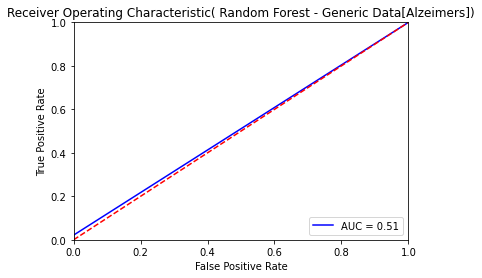

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - Generic Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5107775519674833

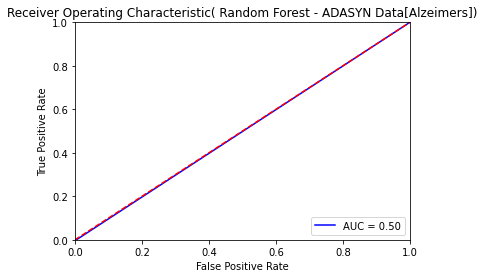

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - ADASYN Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.4978836952521163

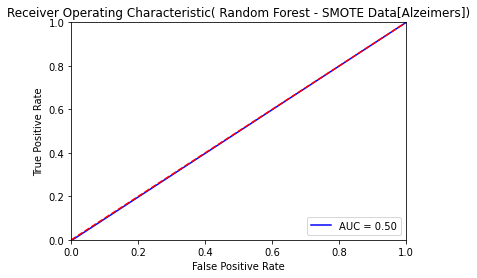

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - SMOTE Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49815973500184024

In [ ]:
import pickle

pickle.dump(clf_alz_rf,open("Alz_Random_Forest", 'wb'))


## Neural Network using PyTorch to predict Alzheimers

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
featuresTrain = torch.from_numpy(X_train_smote.to_numpy()).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(y_train_smote.to_numpy()).type(torch.FloatTensor)

featuresTest = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
targetsTest = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

#batch_size = 100
#n_iters = 10000
#num_epochs = 10
#num_epochs = int(num_epochs)

#train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
#test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

#train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
#test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

#targetsTrain = targetsTrain.to(torch.float32)
#targetsTest = targetsTest.to(torch.float32)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11951, 10500),
            nn.Tanh(),
            nn.Linear(10500, 8000),
            nn.Tanh(),
            nn.Linear(8000, 5000),
            nn.Sigmoid(),
            nn.Linear(5000,3000),
            nn.Tanh(),
            nn.Linear(3000,1000),
            nn.Sigmoid(),
            nn.Linear(1000, 1),
            nn.Sigmoid()

        )
        
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


net = Net()#.to(device)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum = 0.6)
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(30):
  #optimizer.zero_grad()
  y_train_pred = net(featuresTrain)
  y_train_pred = torch.squeeze(y_train_pred)
  train_loss = criterion(y_train_pred, targetsTrain)
  train_loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    train_acc = calculate_accuracy(targetsTrain, y_train_pred)
    y_test_pred = net(featuresTest)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, targetsTest)
    test_acc = calculate_accuracy(targetsTest, y_test_pred)
    print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 0
Train set - loss: 0.694, accuracy: 0.5
Test  set - loss: 0.692, accuracy: 0.992

epoch 10
Train set - loss: 0.693, accuracy: 0.5
Test  set - loss: 0.778, accuracy: 0.008

epoch 20
Train set - loss: 0.705, accuracy: 0.5
Test  set - loss: 0.445, accuracy: 0.992



In [ ]:
print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 29
Train set - loss: 0.723, accuracy: 0.5
Test  set - loss: 0.445, accuracy: 0.992



In [ ]:
print(f'Max Pred: {max(y_test_pred)} \tMin Pred: {min(y_test_pred)}')


Max Pred: 0.3562753200531006 	Min Pred: 0.355911523103714


In [ ]:
max(y_test_pred) == min(y_test_pred)

tensor(False)

In [ ]:
# Generic Threshold = 5.4401e-10
# ADASYN = 0.455245
# SMOTE = 0.734180

In [ ]:
y_test.value_counts()

0    5434
1      46
Name: class_Brain.Alzheimer, dtype: int64

In [ ]:
tres =  0.356205
print(sum(y_test_pred > tres))
print(y_test_pred[y_test_pred > tres])

tensor(83)
tensor([0.3563, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3563, 0.3562, 0.3562,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3563, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3563, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3563, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3563, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3563,
        0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562, 0.3562,
        0.3562, 0.3562], grad_fn=<IndexBackward0>)


In [ ]:
y_pred_np = np.array([1 if (x > tres) else 0 for x in y_test_pred])
y_test_np = np.array(targetsTest)
y_pred_np


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#@title Evaluating Performance of Neural Network
eval(targetsTest,y_pred_np)

TP: 0 	TN: 5351 	FN: 46 	FP: 83


"Accuracy:0.9764598540145986    Precision:0.0    Recall:0.0    F1 Score:Couldn't calculate F1 Score"

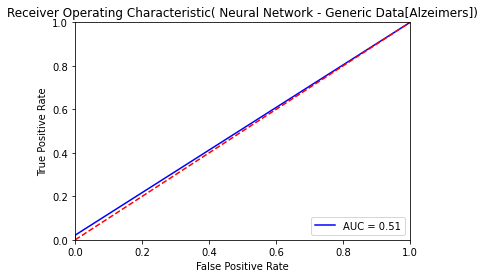

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - Generic Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5107775519674833

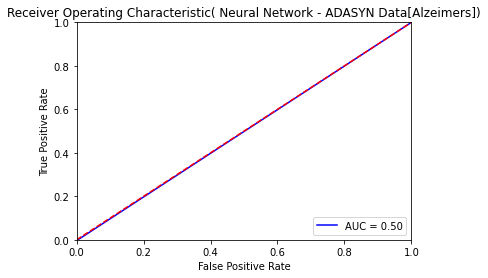

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - ADASYN Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49806772175193226

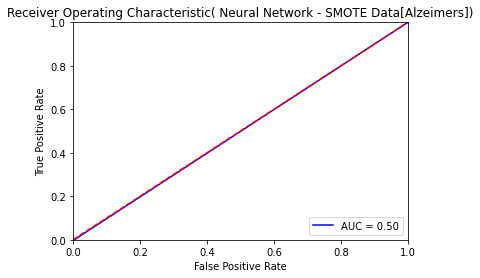

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - SMOTE Data[Alzeimers])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49815973500184024

In [ ]:
torch.save(net.state_dict(), "Alz_Neural_Network")

# Parkison Disease Dataset

In [ ]:
park = pd.merge(df,features[["entrezId","class_Brain.Parkinson"]], on = ["entrezId"])
park

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Brain.Parkinson
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,18,?
18414,729545,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,26,?
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,?
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,?


In [ ]:
park.dtypes

entrezId                  int64
GO:2001280                int64
GO:2001270                int64
GO:2001268                int64
GO:2001206                int64
                          ...  
GO:0008150                int64
GO:0003674                int64
GO:0005575                int64
go_total                  int64
class_Brain.Parkinson    object
Length: 11954, dtype: object

In [ ]:
park.isnull().sum()

entrezId                 0
GO:2001280               0
GO:2001270               0
GO:2001268               0
GO:2001206               0
                        ..
GO:0008150               0
GO:0003674               0
GO:0005575               0
go_total                 0
class_Brain.Parkinson    0
Length: 11954, dtype: int64

In [ ]:
park["class_Brain.Parkinson"].value_counts()

0    18218
?      152
1       48
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
park.select_dtypes("object")

,class_Brain.Parkinson
0,1
1,0
2,0
3,1
4,0
...,...
18413,?
18414,?
18415,?
18416,?


In [ ]:
park = park[park['class_Brain.Parkinson'] != '?']
park

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Brain.Parkinson
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,399949,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,14,0
18406,100288287,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,11,0
18407,728588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0
18409,401667,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,48,0


In [ ]:
park['class_Brain.Parkinson'].value_counts()

0    18218
1       48
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
park['class_Brain.Parkinson'] = pd.to_numeric(park['class_Brain.Parkinson'])
park.select_dtypes("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


""
0
1
2
3
4
...
18404
18406
18407
18409


In [ ]:
park.drop(["entrezId","go_total"], axis = 1, inplace = True)
park

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Brain.Parkinson
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_park = park.drop(['class_Brain.Parkinson'],axis = 1)
Y_park = park["class_Brain.Parkinson"]

X_train, X_test, y_train, y_test = train_test_split(X_park, Y_park, test_size=0.30, random_state=42)

y_train.value_counts()

0    12757
1       29
Name: class_Brain.Parkinson, dtype: int64

## Upsampling using ADASYN(Adaptive Synthetic)

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 1)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
print("Upsampling using ADASYN Complete!")

Upsampling using ADASYN Complete!


In [ ]:
y_train_ada.value_counts()

0    12757
1    12754
Name: class_Brain.Parkinson, dtype: int64

## Upsampling using SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print("Upsampling using SMOTE Complete!")

Upsampling using SMOTE Complete!


In [ ]:
y_train_smote.value_counts()

0    12757
1    12757
Name: class_Brain.Parkinson, dtype: int64

## Logistic Regression Model for predicting Parkinson

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
start = time.time()
clf_park = LogisticRegression(max_iter = 30000).fit(X_train_smote,y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 29.352171897888184 seconds


In [ ]:
def eval(y_test,y_pred):
  TP, TN, FN, FP = 0, 0, 0, 0
  for real,pred in zip(y_test,y_pred):
    if (real == 1 and pred == 1):
      TP += 1
    elif (real == 0 and pred == 1):
      FP += 1
    elif (real == 1 and pred == 0):
      FN += 1
    else:
      TN += 1
  try:
    Accuracy = (TP + TN)/(TP+TN+FP+FN)
  except:
    Accuracy = "Couldn't calculate Accuracy"
  try:
    Precision = TP/(TP+FP)
  except:
    Precision = "Couldn't calculate Precision"
  try:
    Recall = TP/(TP+FN)
  except:
    Recall = "Couldn't calculate Recall"
  try:
    F1_Score = (2*Precision*Recall)/(Precision + Recall)
  except:
    F1_Score = "Couldn't calculate F1 Score"
  print(f"TP: {TP} \tTN: {TN} \tFN: {FN} \tFP: {FP}")
  return (f"Accuracy:{Accuracy}    Precision:{Precision}    Recall:{Recall}    F1 Score:{F1_Score}")

In [ ]:
y_pred = clf_park.predict_proba(X_test)
y_pred

array([[1.00000000e+00, 5.36357442e-15],
       [9.99993687e-01, 6.31283567e-06],
       [9.99844115e-01, 1.55885136e-04],
       ...,
       [1.15198118e-01, 8.84801882e-01],
       [9.99979514e-01, 2.04862576e-05],
       [9.99999109e-01, 8.91176546e-07]])

In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
eval(y_test,y_pred)

TP: 1 	TN: 5329 	FN: 18 	FP: 132


'Accuracy:0.9726277372262774    Precision:0.007518796992481203    Recall:0.05263157894736842    F1 Score:0.013157894736842105'

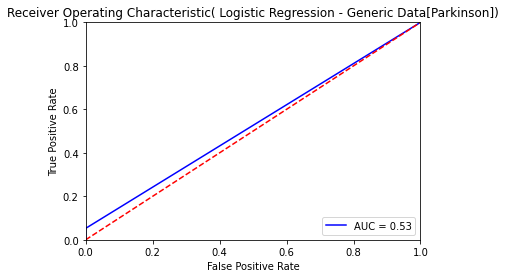

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - Generic Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5263157894736842

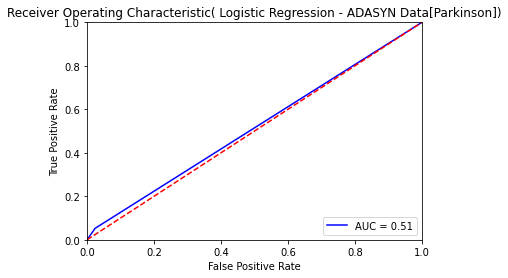

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - ADASYN Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5143216492063338

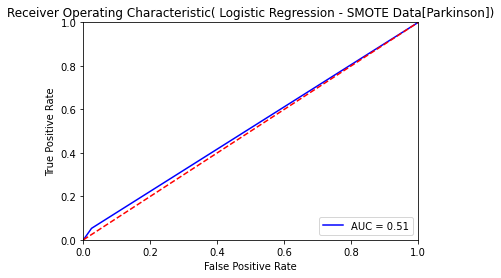

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - SMOTE Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5142300908836823

## Random Forest Model for predicting Parkinson

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_park_rf = RandomForestClassifier()
start = time.time()
clf_park_rf.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"Time taken to train Random Forest Model: {end - start} seconds")


Time taken to train Random Forest Model: 41.66034913063049 seconds


In [ ]:
park['class_Brain.Parkinson'].value_counts()

0    18218
1       48
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
y_train.value_counts()

0    12757
1       29
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
y_pred = clf_park_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1]), array([5414,   66]))

In [ ]:
y_test.value_counts()

0    5461
1      19
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
eval(y_test,y_pred)

TP: 0 	TN: 5395 	FN: 19 	FP: 66


"Accuracy:0.9844890510948905    Precision:0.0    Recall:0.0    F1 Score:Couldn't calculate F1 Score"

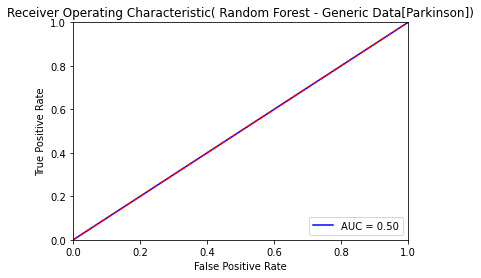

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - Generic Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5

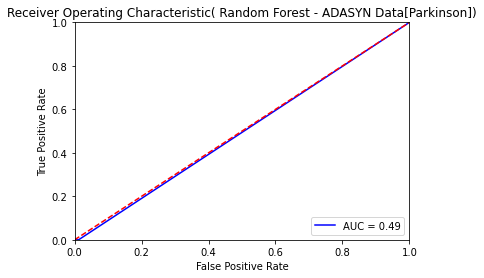

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - ADASYN Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49404870902765063

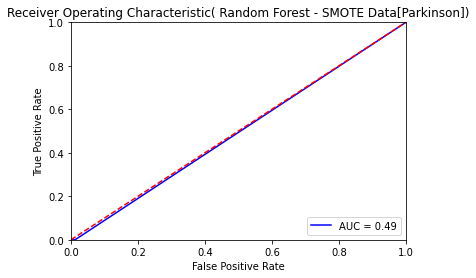

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - SMOTE Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49395715070499907

In [ ]:
import pickle

pickle.dump(clf_park_rf,open("Park_Random_Forest", 'wb'))


## Neural Network using Pytorch to predict Parkinsons

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
featuresTrain = torch.from_numpy(X_train_smote.to_numpy()).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(y_train_smote.to_numpy()).type(torch.FloatTensor)

featuresTest = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
targetsTest = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

##batch_size = 100
#n_iters = 10000
#num_epochs = 10
#num_epochs = int(num_epochs)

#train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
#test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

#train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
#test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)


#targetsTrain = targetsTrain.to(torch.float32)
#targetsTest = targetsTest.to(torch.float32)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11951, 10500),
            nn.Tanh(),
            nn.Linear(10500, 8000),
            nn.Tanh(),
            nn.Linear(8000, 5000),
            nn.Sigmoid(),
            nn.Linear(5000,3000),
            nn.Tanh(),
            nn.Linear(3000,1000),
            nn.Sigmoid(),
            nn.Linear(1000, 1),
            nn.Sigmoid()

        )
        
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


net = Net()#.to(device)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum = 0.7)
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(11):
  #optimizer.zero_grad()
  y_train_pred = net(featuresTrain)
  y_train_pred = torch.squeeze(y_train_pred)
  train_loss = criterion(y_train_pred, targetsTrain)
  train_loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    train_acc = calculate_accuracy(targetsTrain, y_train_pred)
    y_test_pred = net(featuresTest)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, targetsTest)
    test_acc = calculate_accuracy(targetsTest, y_test_pred)
    print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 0
Train set - loss: 0.694, accuracy: 0.5
Test  set - loss: 1.024, accuracy: 0.003

epoch 10
Train set - loss: 0.696, accuracy: 0.5
Test  set - loss: 0.263, accuracy: 0.997



In [ ]:
print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 10
Train set - loss: 0.696, accuracy: 0.5
Test  set - loss: 0.263, accuracy: 0.997



In [ ]:
print(f'Max Pred: {max(y_test_pred)} \tMin Pred: {min(y_test_pred)}')

Max Pred: 0.22803032398223877 	Min Pred: 0.22773464024066925


In [ ]:
max(y_test_pred) == min(y_test_pred)

tensor(False)

In [ ]:
# Generic = 4.6485e-13
# ADASYN = 0.500770
# SMOTE =  0.22803032398223877 

In [ ]:
y_test.value_counts()

0    5461
1      19
Name: class_Brain.Parkinson, dtype: int64

In [ ]:
tres =   0.22798
print(sum(y_test_pred > tres))
print(y_test_pred[y_test_pred > tres])

tensor(28)
tensor([0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280,
        0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280,
        0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280, 0.2280,
        0.2280], grad_fn=<IndexBackward0>)


In [ ]:
y_pred_np = np.array([1 if (x > tres) else 0 for x in y_test_pred])
y_test_np = np.array(targetsTest)
y_pred_np

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
torch.save(net.state_dict(), "parkinson_Neural_Network")

In [ ]:
eval(targetsTest,y_pred_np)


TP: 0 	TN: 5433 	FN: 19 	FP: 28


"Accuracy:0.9914233576642336    Precision:0.0    Recall:0.0    F1 Score:Couldn't calculate F1 Score"

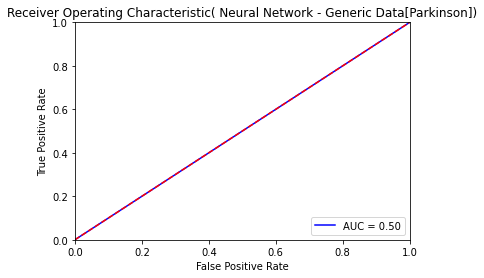

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - Generic Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5

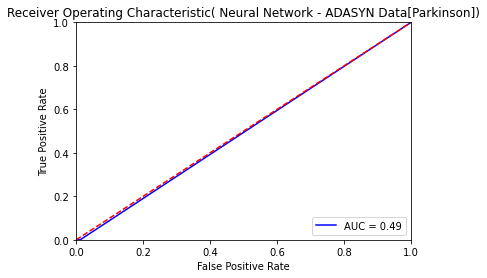

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - ADASYN Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49404870902765063

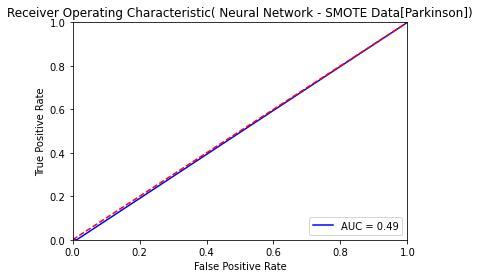

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - SMOTE Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49395715070499907

# Obesity Disease Dataset

In [ ]:
obs = pd.merge(df,features[["entrezId","class_Nutritional.Obesity"]], on = ["entrezId"])
obs

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Nutritional.Obesity
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,138652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,18,?
18414,729545,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,26,?
18415,100132025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,?
18416,105373297,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,?


In [ ]:
obs.dtypes

entrezId                      int64
GO:2001280                    int64
GO:2001270                    int64
GO:2001268                    int64
GO:2001206                    int64
                              ...  
GO:0008150                    int64
GO:0003674                    int64
GO:0005575                    int64
go_total                      int64
class_Nutritional.Obesity    object
Length: 11954, dtype: object

In [ ]:
obs.isnull().sum()

entrezId                     0
GO:2001280                   0
GO:2001270                   0
GO:2001268                   0
GO:2001206                   0
                            ..
GO:0008150                   0
GO:0003674                   0
GO:0005575                   0
go_total                     0
class_Nutritional.Obesity    0
Length: 11954, dtype: int64

In [ ]:
obs["class_Nutritional.Obesity"].value_counts()

0    18139
?      152
1      127
Name: class_Nutritional.Obesity, dtype: int64

In [ ]:
obs.select_dtypes("object")

,class_Nutritional.Obesity
0,1
1,0
2,0
3,1
4,0
...,...
18413,?
18414,?
18415,?
18416,?


In [ ]:
obs = obs[obs['class_Nutritional.Obesity'] != '?']
obs

,entrezId,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,...,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,go_total,class_Nutritional.Obesity
0,348,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1622,1
1,351,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1028,0
2,672,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1453,0
3,1636,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,544,1
4,1956,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,399949,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,14,0
18406,100288287,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,11,0
18407,728588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0
18409,401667,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,48,0


In [ ]:
obs['class_Nutritional.Obesity'].value_counts()

0    18139
1      127
Name: class_Nutritional.Obesity, dtype: int64

In [ ]:
obs['class_Nutritional.Obesity'] = pd.to_numeric(obs['class_Nutritional.Obesity'])
obs.select_dtypes("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


""
0
1
2
3
4
...
18404
18406
18407
18409


In [ ]:
obs.drop(["entrezId","go_total"], axis = 1, inplace = True)
obs

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GO:2001280,GO:2001270,GO:2001268,GO:2001206,GO:2001187,GO:2001181,GO:2001137,GO:2001027,GO:2001013,GO:2000981,...,GO:0005515,GO:0065007,GO:0044424,GO:0005488,GO:0009987,GO:0044464,GO:0008150,GO:0003674,GO:0005575,class_Nutritional.Obesity
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
18406,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
18407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18409,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_park = obs.drop(['class_Nutritional.Obesity'],axis = 1)
Y_park = obs["class_Nutritional.Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X_park, Y_park, test_size=0.30, random_state=42)

y_train.value_counts()

0    12697
1       89
Name: class_Nutritional.Obesity, dtype: int64

## Upsampling using ADASYN(Adaptive Synthetic)

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 1)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
print("Upsampling using ADASYN Complete!")

Upsampling using ADASYN Complete!


In [ ]:
y_train_ada.value_counts()

0    12697
1    12690
Name: class_Nutritional.Obesity, dtype: int64

## Upsampling using SMOTE(Synthetic minority Over-sapling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print("Upsampling using SMOTE Complete!")

Upsampling using SMOTE Complete!


In [ ]:
y_train_smote.value_counts()

0    12697
1    12697
Name: class_Nutritional.Obesity, dtype: int64

## Logistic Regression Model for predicting Obesity

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
start = time.time()
clf_obs = LogisticRegression(max_iter = 30000).fit(X_train_smote,y_train_smote)
end = time.time()
print(f"Time taken to train Logistic Regression Model: {end - start} seconds")

Time taken to train Logistic Regression Model: 40.569171667099 seconds


In [ ]:
def eval(y_test,y_pred):
  TP, TN, FN, FP = 0, 0, 0, 0
  for real,pred in zip(y_test,y_pred):
    if (real == 1 and pred == 1):
      TP += 1
    elif (real == 0 and pred == 1):
      FP += 1
    elif (real == 1 and pred == 0):
      FN += 1
    else:
      TN += 1
  try:
    Accuracy = (TP + TN)/(TP+TN+FP+FN)
  except:
    Accuracy = "Couldn't calculate Accuracy"
  try:
    Precision = TP/(TP+FP)
  except:
    Precision = "Couldn't calculate Precision"
  try:
    Recall = TP/(TP+FN)
  except:
    Recall = "Couldn't calculate Recall"
  try:
    F1_Score = (2*Precision*Recall)/(Precision + Recall)
  except:
    F1_Score = "Couldn't calculate F1 Score"
  print(f"TP: {TP} \tTN: {TN} \tFN: {FN} \tFP: {FP}")
  return (f"Accuracy:{Accuracy}    Precision:{Precision}    Recall:{Recall}    F1 Score:{F1_Score}")

In [ ]:
y_pred = clf_obs.predict_proba(X_test)
y_pred

array([[1.00000000e+00, 6.04280691e-16],
       [9.96465716e-01, 3.53428374e-03],
       [9.85444784e-01, 1.45552156e-02],
       ...,
       [1.71350630e-01, 8.28649370e-01],
       [9.99928234e-01, 7.17656210e-05],
       [9.99994775e-01, 5.22543205e-06]])

In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
eval(y_test,y_pred)

TP: 8 	TN: 5268 	FN: 30 	FP: 174


'Accuracy:0.9627737226277372    Precision:0.04395604395604396    Recall:0.21052631578947367    F1 Score:0.07272727272727272'

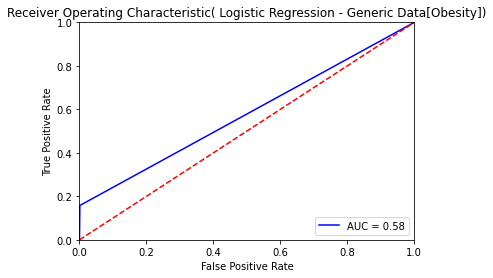

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - Generic Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5783961005048454

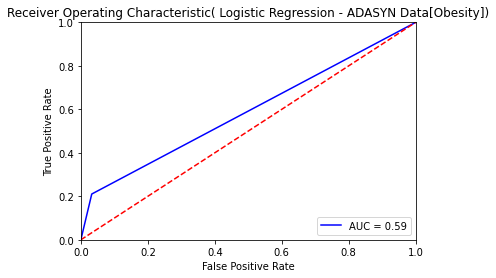

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - ADASYN Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5890007543666222

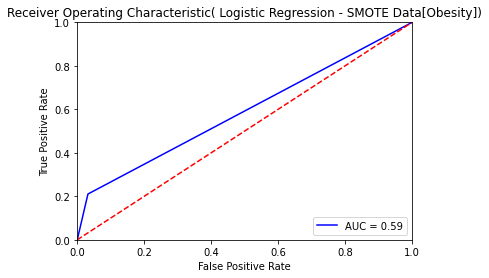

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Logistic Regression - SMOTE Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5892763883247257

## Random Forest Model for predicting Obesity

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_obs_rf = RandomForestClassifier()
start = time.time()
clf_obs_rf.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"Time taken to train Random Forest Model: {end - start} seconds")


Time taken to train Random Forest Model: 52.2544002532959 seconds


In [ ]:
y_pred = clf_obs_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1]), array([5407,   73]))

In [ ]:
eval(y_test,y_pred)

TP: 0 	TN: 5369 	FN: 38 	FP: 73


"Accuracy:0.9797445255474453    Precision:0.0    Recall:0.0    F1 Score:Couldn't calculate F1 Score"

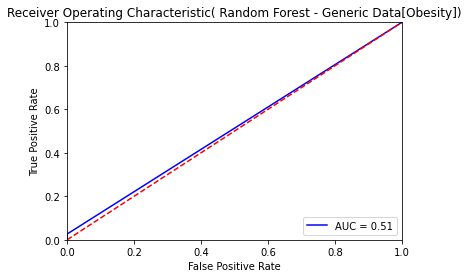

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - Generic Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5131578947368421

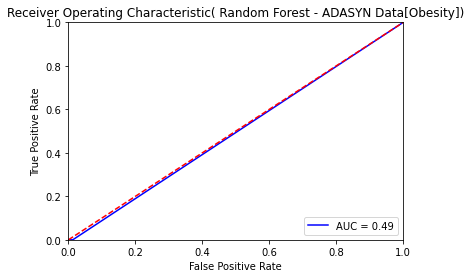

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - ADASYN Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49347666299154724

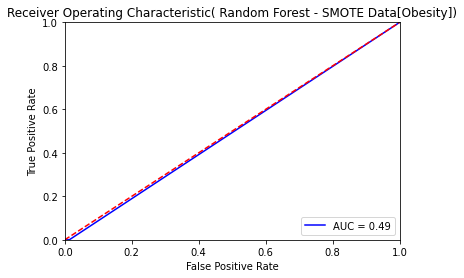

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Random Forest - SMOTE Data[Obesity])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.49329290701947814

## Neural Network using PyTorch to predict Obesity

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
featuresTrain = torch.from_numpy(X_train_smote.to_numpy()).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(y_train_smote.to_numpy()).type(torch.FloatTensor)

featuresTest = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
targetsTest = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11951, 10500),
            nn.Tanh(),
            nn.Linear(10500, 8000),
            nn.Tanh(),
            nn.Linear(8000, 5000),
            nn.Sigmoid(),
            nn.Linear(5000,3000),
            nn.Tanh(),
            nn.Linear(3000,1000),
            nn.Sigmoid(),
            nn.Linear(1000, 1),
            nn.Sigmoid()

        )
        
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


net = Net()#.to(device)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11951, out_features=10500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10500, out_features=8000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8000, out_features=5000, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=5000, out_features=3000, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3000, out_features=1000, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=1000, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum = 0.7)
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(12):
  #optimizer.zero_grad()
  y_train_pred = net(featuresTrain)
  y_train_pred = torch.squeeze(y_train_pred)
  train_loss = criterion(y_train_pred, targetsTrain)
  train_loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    train_acc = calculate_accuracy(targetsTrain, y_train_pred)
    y_test_pred = net(featuresTest)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, targetsTest)
    test_acc = calculate_accuracy(targetsTest, y_test_pred)
    print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 0
Train set - loss: 1.049, accuracy: 0.5
Test  set - loss: 0.804, accuracy: 0.007

epoch 10
Train set - loss: 5.242, accuracy: 0.5
Test  set - loss: 0.071, accuracy: 0.993



In [ ]:
print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

epoch 11
Train set - loss: 5.1, accuracy: 0.5
Test  set - loss: 0.071, accuracy: 0.993



In [ ]:
print(f'Max Pred: {max(y_test_pred)} \tMin Pred: {min(y_test_pred)}')

Max Pred: 3.725268834386952e-05 	Min Pred: 3.713911064551212e-05


In [ ]:
max(y_test_pred) == min(y_test_pred)

tensor(False)

In [ ]:
# Generic = 1.20495e-10
# ADASYN =  0.4768484979
# SMOTE =  0.22803032398223877 

In [ ]:
tres =  3.72170e-05 
print(sum(y_test_pred >= tres))
print(y_test_pred[y_test_pred > tres])

tensor(41)
tensor([3.7225e-05, 3.7253e-05, 3.7229e-05, 3.7230e-05, 3.7238e-05, 3.7232e-05,
        3.7217e-05, 3.7237e-05, 3.7221e-05, 3.7225e-05, 3.7227e-05, 3.7236e-05,
        3.7243e-05, 3.7236e-05, 3.7241e-05, 3.7219e-05, 3.7241e-05, 3.7218e-05,
        3.7231e-05, 3.7222e-05, 3.7219e-05, 3.7229e-05, 3.7220e-05, 3.7219e-05,
        3.7217e-05, 3.7221e-05, 3.7219e-05, 3.7224e-05, 3.7228e-05, 3.7222e-05,
        3.7242e-05, 3.7220e-05, 3.7217e-05, 3.7233e-05, 3.7217e-05, 3.7226e-05,
        3.7226e-05, 3.7233e-05, 3.7248e-05, 3.7229e-05, 3.7226e-05],
       grad_fn=<IndexBackward0>)


In [ ]:
y_test.value_counts()

0    5442
1      38
Name: class_Nutritional.Obesity, dtype: int64

In [ ]:
y_pred_np = np.array([1 if (x > tres) else 0 for x in y_test_pred])
y_test_np = np.array(targetsTest)
y_pred_np

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
eval(targetsTest,y_pred_np)


TP: 5 	TN: 5406 	FN: 33 	FP: 36


'Accuracy:0.9874087591240875    Precision:0.12195121951219512    Recall:0.13157894736842105    F1 Score:0.12658227848101267'

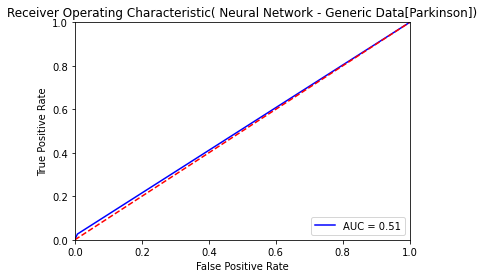

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - Generic Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5093908973094258

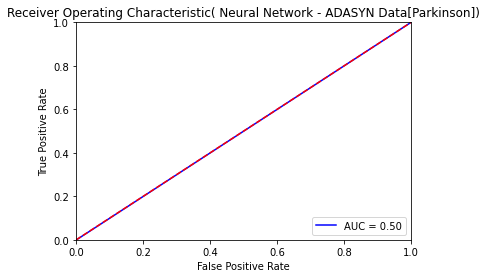

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - ADASYN Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.4996324880558618

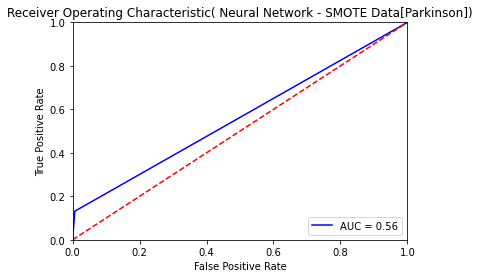

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_np)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic( Neural Network - SMOTE Data[Parkinson])')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

0.5624818661869668